# Solving Simflied Thick Ptychography Model Least Squares Problem

This tutorial demonstrates how to use `thick-ptycho` to set up and solve a least_squares problem to reconstuct a thick sample.

The wave inversion is posed as a least-squares problem:

\begin{equation}
E(n) = \frac{1}{2} \sum_{i=1}^{N} \| p_i(n) - p_{\text{obs},i} \|^2_2,
\end{equation}

where $p_i$ and $p_{\text{obs},i}$ are the simulated and observed exit waves for the $i$-th probe position in Ptychography. 

$n(x,z)$ defines the refractive index of the volume

### 1. Import Libraries: Sample Space, Least Squares Solver and Visualisation

In [ ]:
from thick_ptycho.sample_space.sample_space import SampleSpace
from thick_ptycho.reconstruction.least_squares import LeastSquaresSolver
from thick_ptycho.utils.visualisations import Visualisation

### 2. Set Simulation Parameters

Choose boundary conditions, probe type, and define the spatial domain and discretization.

In [2]:
bc_type = "impedance"     # Boundary condition type 
probe_type = "disk"                 # Disk probe
wave_number = 5e-1                   # Wavenumber (micrometers^-1)

# Continuous space limits (micrometers)
xlims = [0,1500]                    # X limits in micrometers
zlims = [0,5000]                   # Z limits in micrometers
continuous_dimensions = [
    xlims,
    zlims
    ]                     # Continuous dimensions in micrometers

# Discrete space parameters
propagation_slices = 80             # Number of z slices
probe_dimensions = [15]             # Discrete Probe dimensions
scan_points = 100                   # Large number of probes needed
step_size = 2                       # Step size in pixels


# Discrete space limits (pixels)
min_nx = int(scan_points * step_size + probe_dimensions[0])
print(f"Pixels for compatibility with Diamond thin-sample simulation:")
print(f"nx = {min_nx}")
print(f"(These are also the minimum values for the discrete space limits)")

# Number of pixels in x directions
nx= 220
if nx < min_nx:
    nx = min_nx
discrete_dimensions = [
    nx,
    propagation_slices
    ]   

Pixels for compatibility with Diamond thin-sample simulation:
nx = 215
(These are also the minimum values for the discrete space limits)


### 3. Create Sample Space, Add Objects and Visualise it.

Add rectangles with specified refractive indices to the sample space.

In [3]:
sample_space = SampleSpace(
    continuous_dimensions, # sample space dimensions in nanometers (x, z) or (x, y, z)
    discrete_dimensions,   # sample space dimensions in pixels (nx, nz) or (nx, ny, nz)
    probe_dimensions,        # shape of the detector in pixels - subset of (nx) or (nx, ny)
    scan_points,           # number of ptychography scan points or sqrt(scan_points) for square scan
    step_size,
    bc_type,               # boundary condition type (impedance, dirichlet, neumann)
    probe_type,
    wave_number,            # wavenumber in 1/nm
)
sample_space.summarize_sample_space()
visualisation = Visualisation(sample_space)

Summary of the scan (continuous):
    Sample space x: 1500 um
    Sample space z: 5000 um
    Probe Diameter: 102.74 um
    Number of scan points: 100
    Max Overlap: 89.10 um 



In [4]:
delta = 1e-4
beta = 1e-6j
refractive_index1 = - delta + beta
refractive_index2 = - 0.9 * delta + 1.1*beta
guassian_blur = 0.6

sample_space.add_object('circle', refractive_index1, side_length=75, centre=(xlims[1]*0.85,zlims[1]*0.8),depth=600,guassian_blur=guassian_blur)
sample_space.add_object('circle', refractive_index1, side_length=75, centre=(xlims[1]*0.5,zlims[1]*0.5),depth=600,guassian_blur=guassian_blur)
sample_space.add_object('circle', refractive_index1, side_length=75, centre=(xlims[1]*0.25,zlims[1]*0.25),depth=600,guassian_blur=guassian_blur)
sample_space.add_object('circle', refractive_index2, side_length=150, centre=(xlims[1]*0.7,zlims[1]*0.2),depth=1200,guassian_blur=guassian_blur)
sample_space.add_object('circle', refractive_index2, side_length=150, centre=(xlims[1]*0.15,zlims[1]*0.8),depth=1200,guassian_blur=guassian_blur)
sample_space.generate_sample_space()

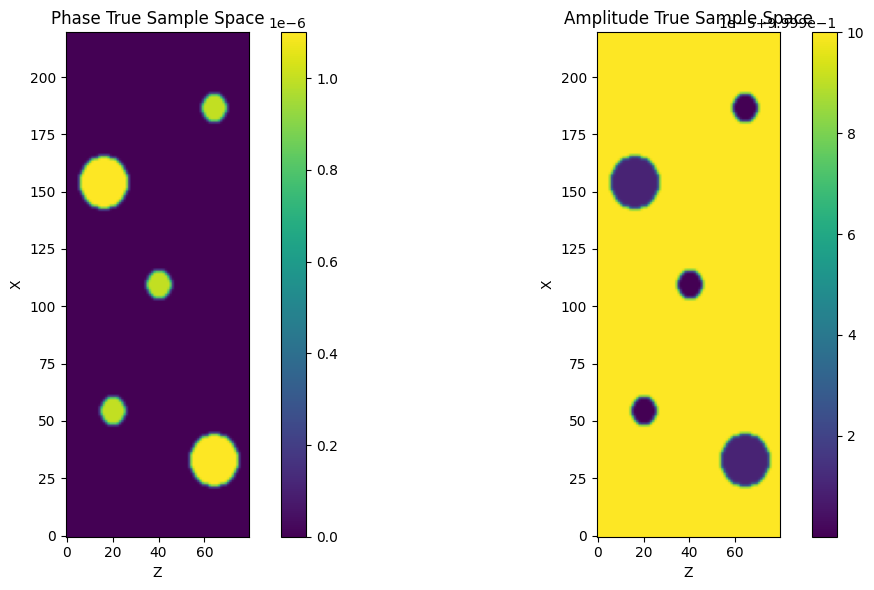

In [5]:
# Plot the true sample space
title = "True Sample Space"
visualisation.plot(sample_space.n_true, title=title)

### 6. Solve Least Squares to Reconstruct Simulated Sample Space


In [6]:
# Solve full system all-at-once or iteratively
least_squares = LeastSquaresSolver(sample_space,full_system_solver=True)

Initializing Least Squares Solver...
Solving the true forward problem once to generate the dataset...
True Forward Solution computed in 0.85 seconds.


True Object


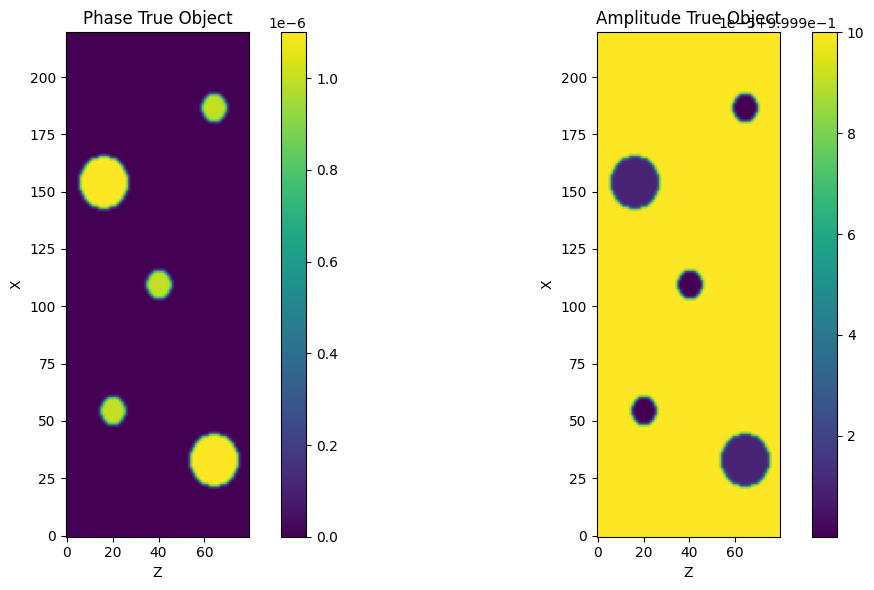

Iteration 1/100
    RMSE: 2.207655835982676e-05
    Reconstructed Object


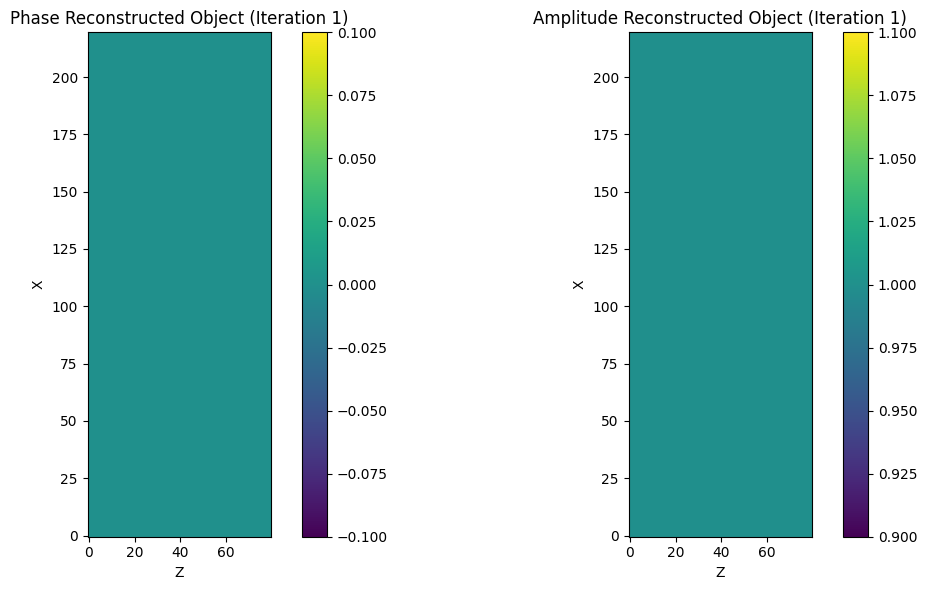

    Iteration 1 took 1.46 seconds.
Iteration 2/100
    RMSE: 2.1729248597075923e-05
    Iteration 2 took 1.50 seconds.
Iteration 3/100
    RMSE: 2.141855567041161e-05
    Iteration 3 took 1.25 seconds.
Iteration 4/100
    RMSE: 2.113249872212512e-05
    Iteration 4 took 1.29 seconds.
Iteration 5/100
    RMSE: 2.086778492027951e-05
    Reconstructed Object


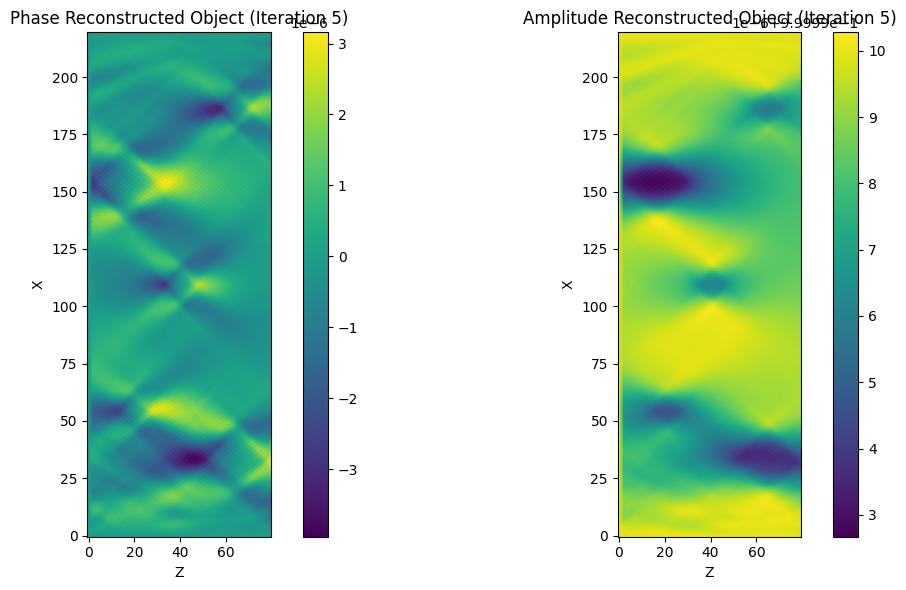

    Iteration 5 took 1.54 seconds.
Iteration 6/100
    RMSE: 2.0621979891951724e-05
    Iteration 6 took 1.28 seconds.
Iteration 7/100
    RMSE: 2.039305739833898e-05
    Iteration 7 took 1.22 seconds.
Iteration 8/100
    RMSE: 2.01792839921448e-05
    Iteration 8 took 1.37 seconds.
Iteration 9/100
    RMSE: 1.997915190658198e-05
    Iteration 9 took 1.40 seconds.
Iteration 10/100
    RMSE: 1.9791340052811943e-05
    Reconstructed Object


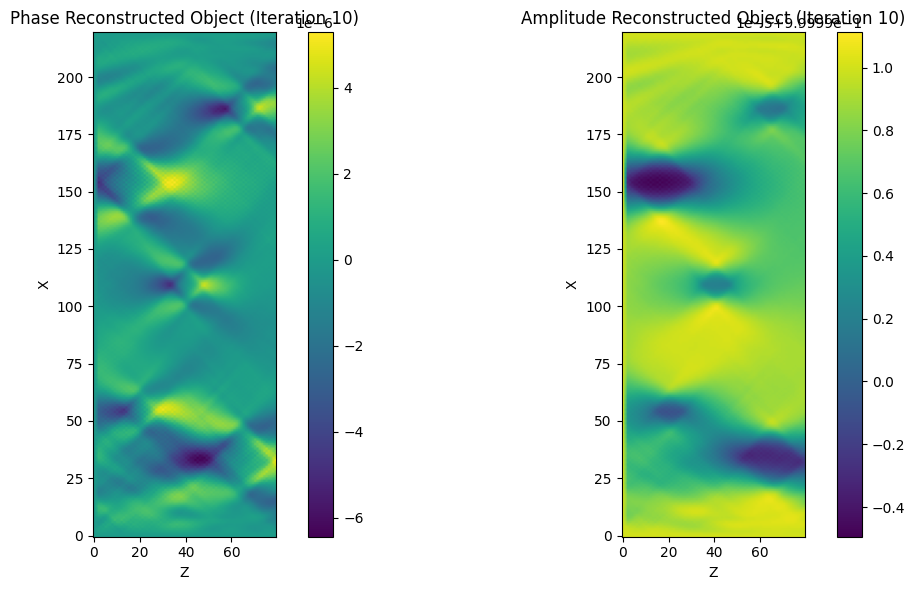

    Iteration 10 took 1.66 seconds.
Iteration 11/100
    RMSE: 1.9614688347239182e-05
    Iteration 11 took 1.68 seconds.
Iteration 12/100
    RMSE: 1.9448184226052193e-05
    Iteration 12 took 1.53 seconds.
Iteration 13/100
    RMSE: 1.9290926854731223e-05
    Iteration 13 took 1.23 seconds.
Iteration 14/100
    RMSE: 1.914212298338922e-05
    Iteration 14 took 1.23 seconds.
Iteration 15/100
    RMSE: 1.900108344328432e-05
    Reconstructed Object


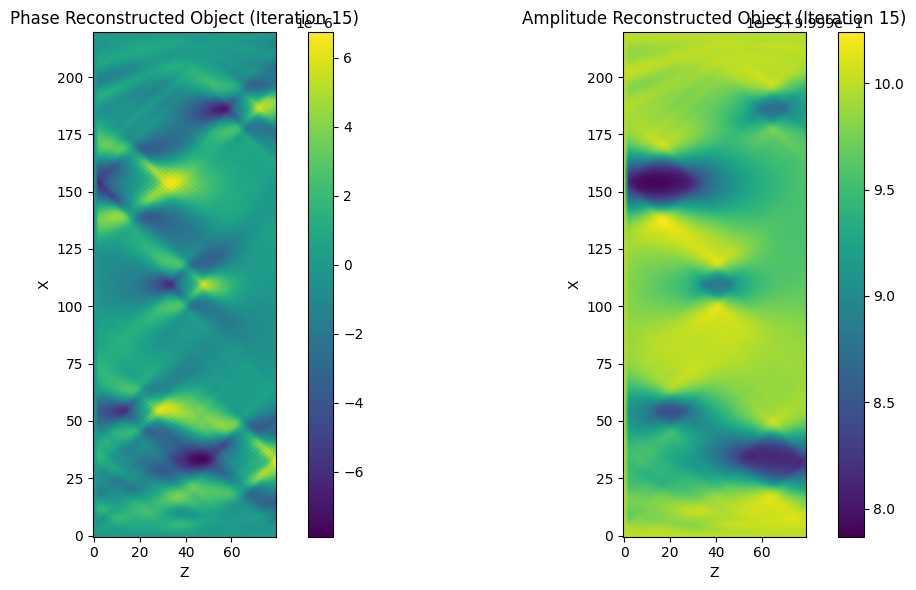

    Iteration 15 took 1.46 seconds.
Iteration 16/100
    RMSE: 1.886720120043678e-05
    Iteration 16 took 1.41 seconds.
Iteration 17/100
    RMSE: 1.873994221163821e-05
    Iteration 17 took 1.20 seconds.
Iteration 18/100
    RMSE: 1.8618835439252517e-05
    Iteration 18 took 1.26 seconds.
Iteration 19/100
    RMSE: 1.8503463647676732e-05
    Iteration 19 took 1.28 seconds.
Iteration 20/100
    RMSE: 1.839345998400038e-05
    Reconstructed Object


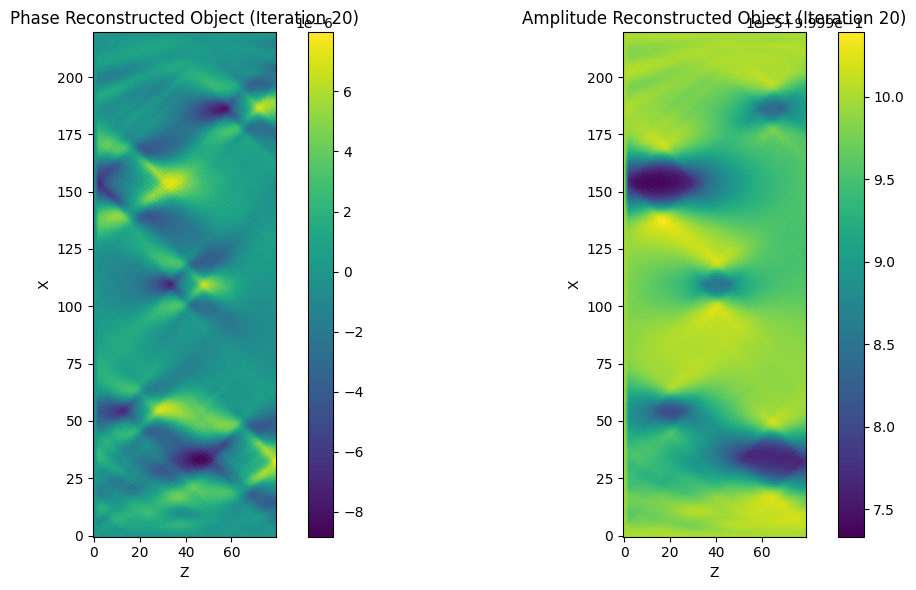

    Iteration 20 took 1.47 seconds.
Iteration 21/100
    RMSE: 1.82884807227053e-05
    Iteration 21 took 1.34 seconds.
Iteration 22/100
    RMSE: 1.8188235458130193e-05
    Iteration 22 took 1.17 seconds.
Iteration 23/100
    RMSE: 1.8092419964399454e-05
    Iteration 23 took 1.28 seconds.
Iteration 24/100
    RMSE: 1.800080508895932e-05
    Iteration 24 took 1.23 seconds.
Iteration 25/100
    RMSE: 1.7913126716910097e-05
    Reconstructed Object


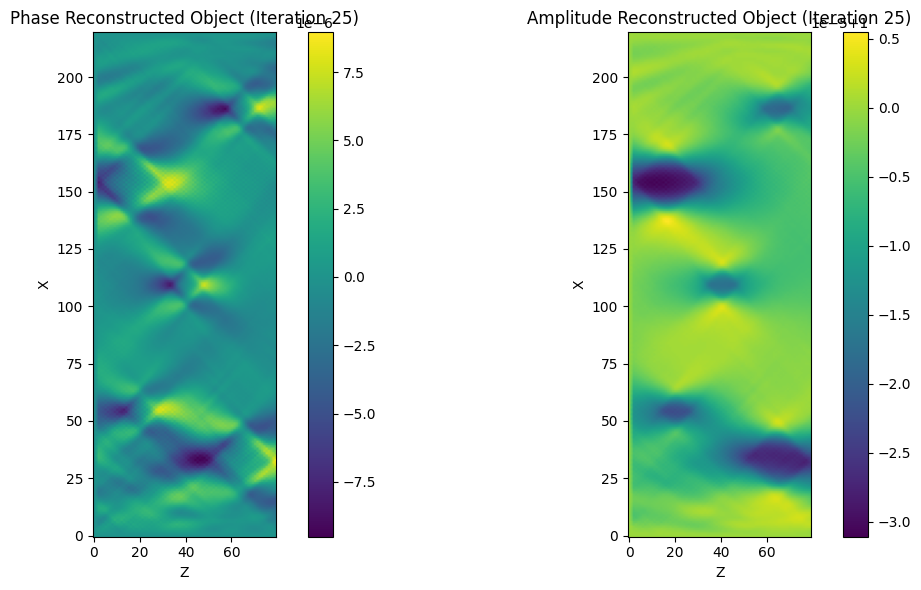

    Iteration 25 took 1.60 seconds.
Iteration 26/100
    RMSE: 1.7829189310669972e-05
    Iteration 26 took 1.31 seconds.
Iteration 27/100
    RMSE: 1.774876626224878e-05
    Iteration 27 took 1.39 seconds.
Iteration 28/100
    RMSE: 1.7671644402625303e-05
    Iteration 28 took 1.38 seconds.
Iteration 29/100
    RMSE: 1.7597673081395877e-05
    Iteration 29 took 1.36 seconds.
Iteration 30/100
    RMSE: 1.752666856781086e-05
    Reconstructed Object


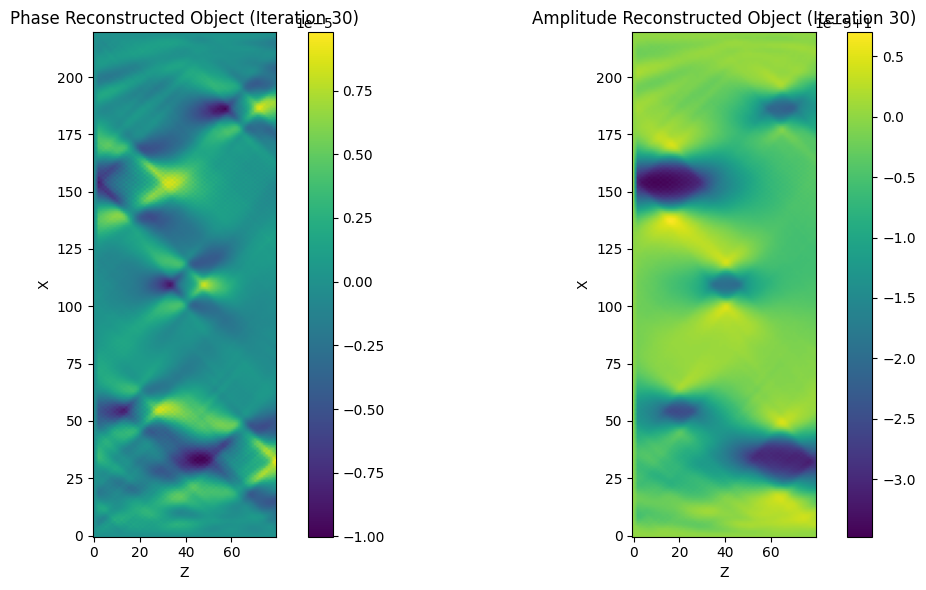

    Iteration 30 took 1.67 seconds.
Iteration 31/100
    RMSE: 1.7458473467677412e-05
    Iteration 31 took 1.29 seconds.
Iteration 32/100
    RMSE: 1.73929088624288e-05
    Iteration 32 took 1.61 seconds.
Iteration 33/100
    RMSE: 1.7329852007415936e-05
    Iteration 33 took 1.42 seconds.
Iteration 34/100
    RMSE: 1.726916247605777e-05
    Iteration 34 took 1.32 seconds.
Iteration 35/100
    RMSE: 1.7210712685009125e-05
    Reconstructed Object


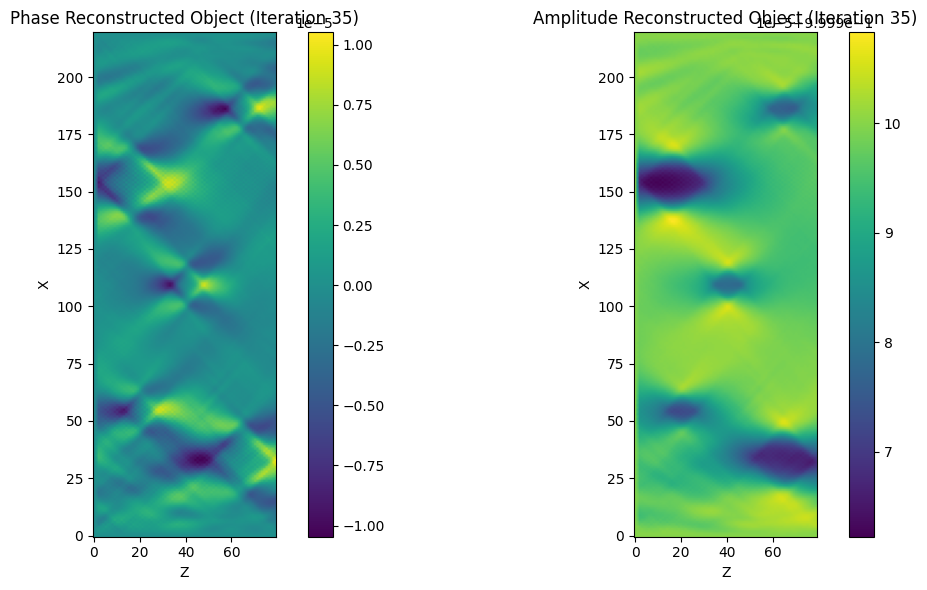

    Iteration 35 took 1.57 seconds.
Iteration 36/100
    RMSE: 1.7154366806874095e-05
    Iteration 36 took 1.39 seconds.
Iteration 37/100
    RMSE: 1.710002852591944e-05
    Iteration 37 took 1.28 seconds.
Iteration 38/100
    RMSE: 1.7047587882580854e-05
    Iteration 38 took 1.52 seconds.
Iteration 39/100
    RMSE: 1.6996949223017226e-05
    Iteration 39 took 1.31 seconds.
Iteration 40/100
    RMSE: 1.6948020370608006e-05
    Reconstructed Object


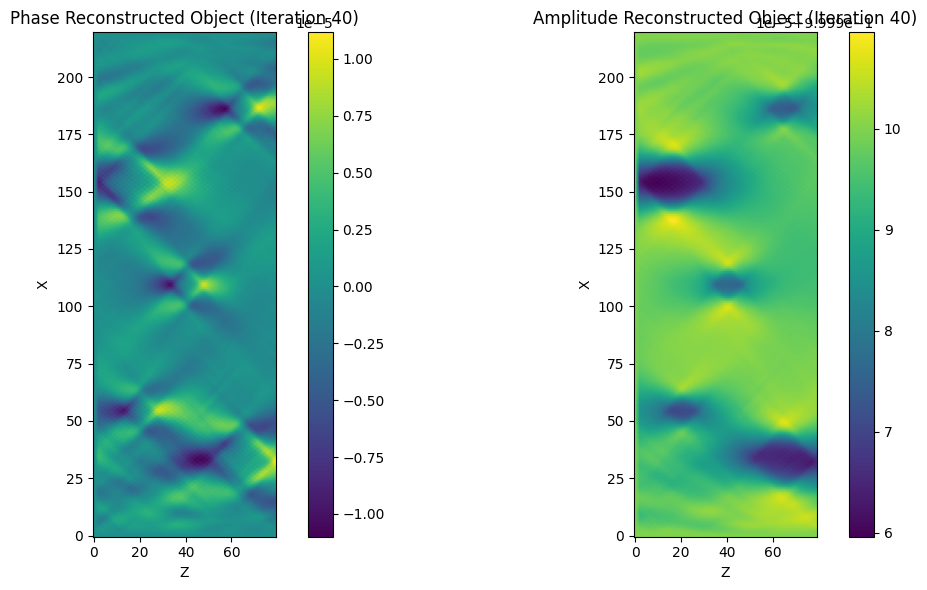

    Iteration 40 took 1.69 seconds.
Iteration 41/100
    RMSE: 1.6900719234532755e-05
    Iteration 41 took 1.40 seconds.
Iteration 42/100
    RMSE: 1.6854957632696223e-05
    Iteration 42 took 1.29 seconds.
Iteration 43/100
    RMSE: 1.681066441687763e-05
    Iteration 43 took 1.23 seconds.
Iteration 44/100
    RMSE: 1.6767768253146115e-05
    Iteration 44 took 1.31 seconds.
Iteration 45/100
    RMSE: 1.6726204360742594e-05
    Reconstructed Object


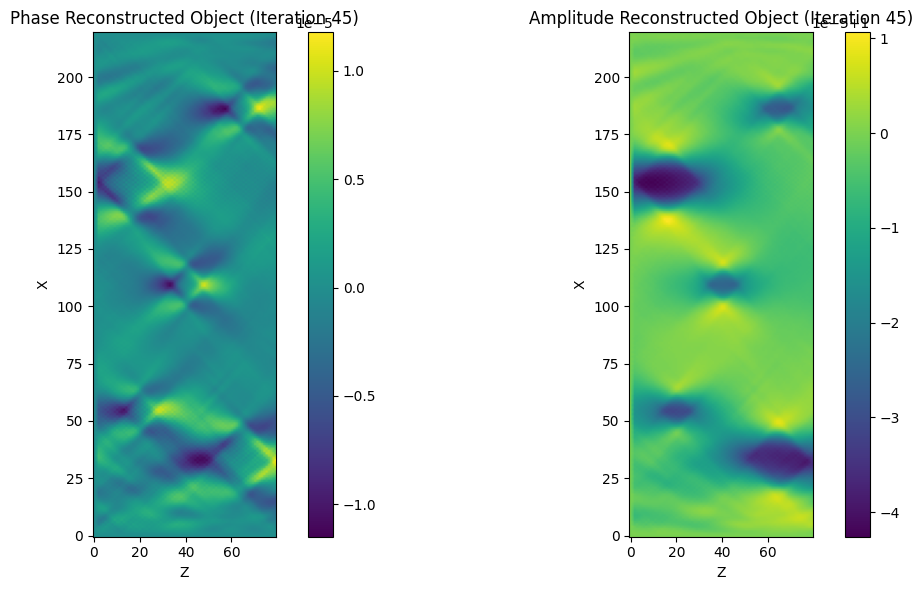

    Iteration 45 took 1.55 seconds.
Iteration 46/100
    RMSE: 1.668591474811802e-05
    Iteration 46 took 1.43 seconds.
Iteration 47/100
    RMSE: 1.664684011708206e-05
    Iteration 47 took 1.88 seconds.
Iteration 48/100
    RMSE: 1.66089250131056e-05
    Iteration 48 took 1.69 seconds.
Iteration 49/100
    RMSE: 1.6572120948984033e-05
    Iteration 49 took 1.61 seconds.
Iteration 50/100
    RMSE: 1.6536380963956235e-05
    Reconstructed Object


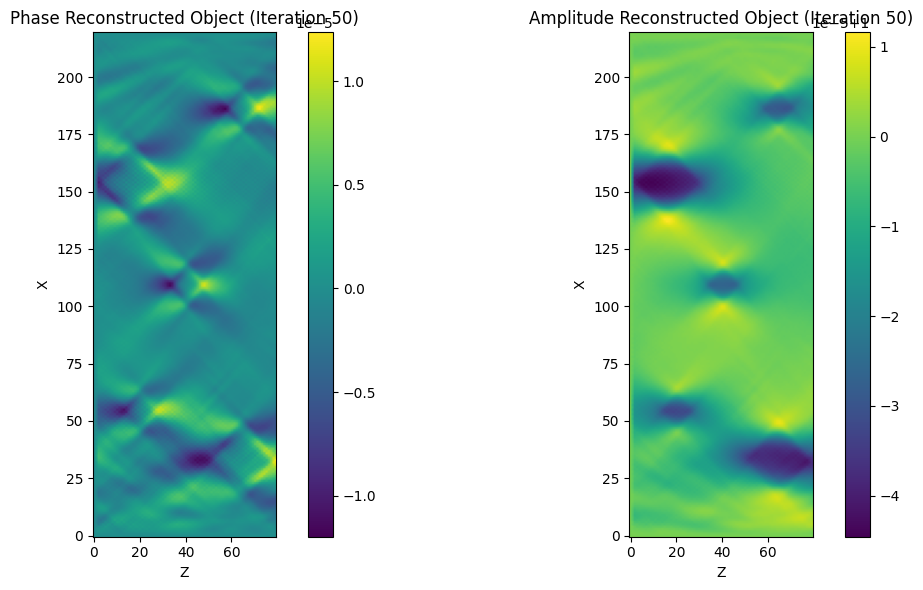

    Iteration 50 took 2.15 seconds.
Iteration 51/100
    RMSE: 1.6501663109949112e-05
    Iteration 51 took 1.45 seconds.
Iteration 52/100
    RMSE: 1.646792341775718e-05
    Iteration 52 took 1.26 seconds.
Iteration 53/100
    RMSE: 1.643512375549546e-05
    Iteration 53 took 1.29 seconds.
Iteration 54/100
    RMSE: 1.640323074728153e-05
    Iteration 54 took 1.32 seconds.
Iteration 55/100
    RMSE: 1.63721954249449e-05
    Reconstructed Object


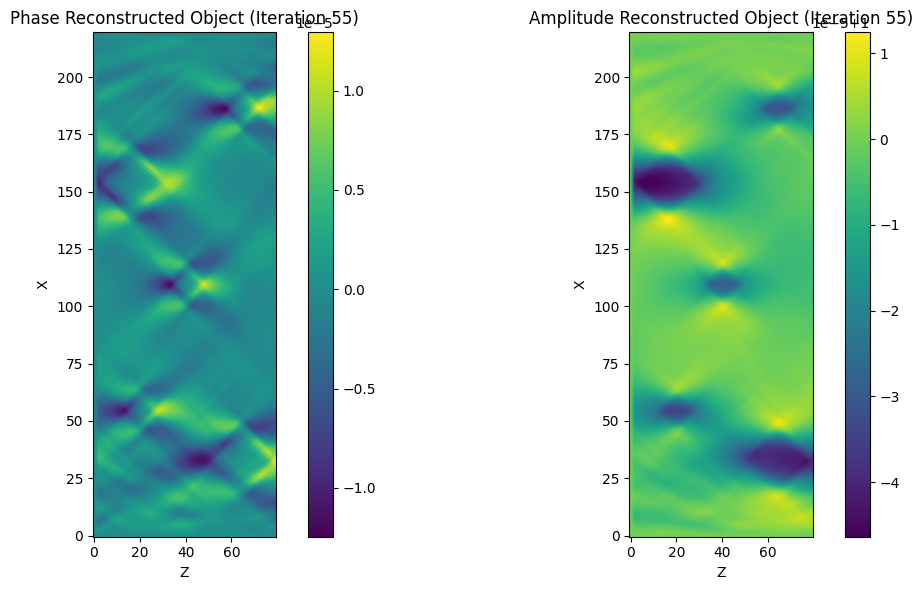

    Iteration 55 took 1.72 seconds.
Iteration 56/100
    RMSE: 1.634199735354706e-05
    Iteration 56 took 1.52 seconds.
Iteration 57/100
    RMSE: 1.6312606575957488e-05
    Iteration 57 took 1.35 seconds.
Iteration 58/100
    RMSE: 1.628399442564403e-05
    Iteration 58 took 1.65 seconds.
Iteration 59/100
    RMSE: 1.6256134744909097e-05
    Iteration 59 took 1.48 seconds.
Iteration 60/100
    RMSE: 1.622900044765705e-05
    Reconstructed Object


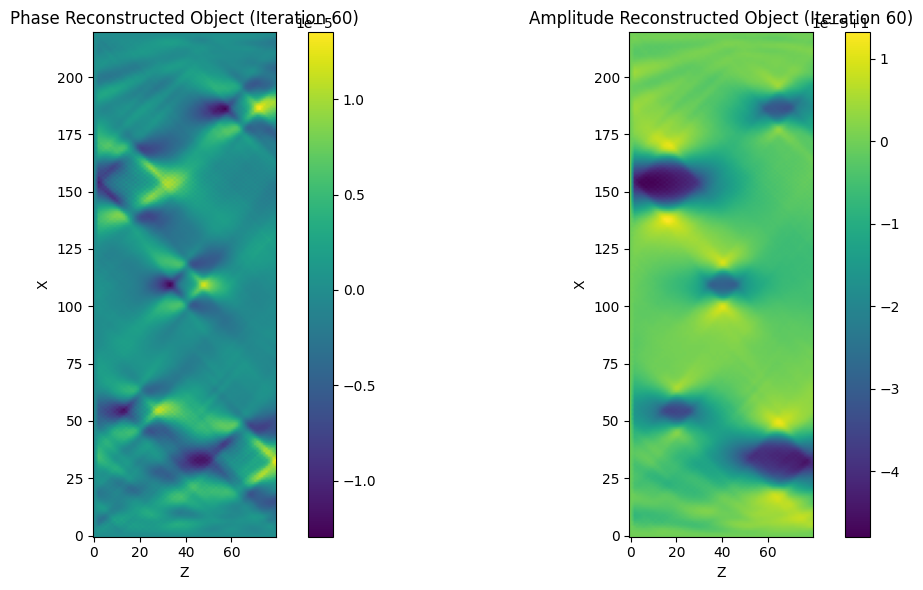

    Iteration 60 took 2.09 seconds.
Iteration 61/100
    RMSE: 1.6202565913673685e-05
    Iteration 61 took 1.47 seconds.
Iteration 62/100
    RMSE: 1.6176810012654945e-05
    Iteration 62 took 1.47 seconds.
Iteration 63/100
    RMSE: 1.6151712823151554e-05
    Iteration 63 took 1.34 seconds.
Iteration 64/100
    RMSE: 1.6127253565277875e-05
    Iteration 64 took 1.31 seconds.
Iteration 65/100
    RMSE: 1.6103410419040284e-05
    Reconstructed Object


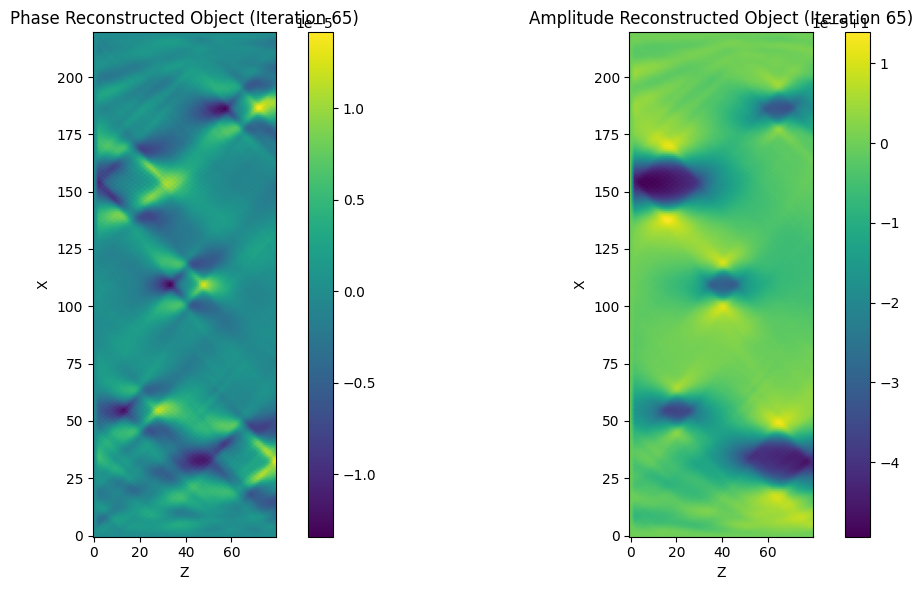

    Iteration 65 took 1.63 seconds.
Iteration 66/100
    RMSE: 1.608016611487971e-05
    Iteration 66 took 1.46 seconds.
Iteration 67/100
    RMSE: 1.60575000643715e-05
    Iteration 67 took 1.30 seconds.
Iteration 68/100
    RMSE: 1.6035395348523275e-05
    Iteration 68 took 2.31 seconds.
Iteration 69/100
    RMSE: 1.6013835545964188e-05
    Iteration 69 took 1.37 seconds.
Iteration 70/100
    RMSE: 1.5992802172758173e-05
    Reconstructed Object


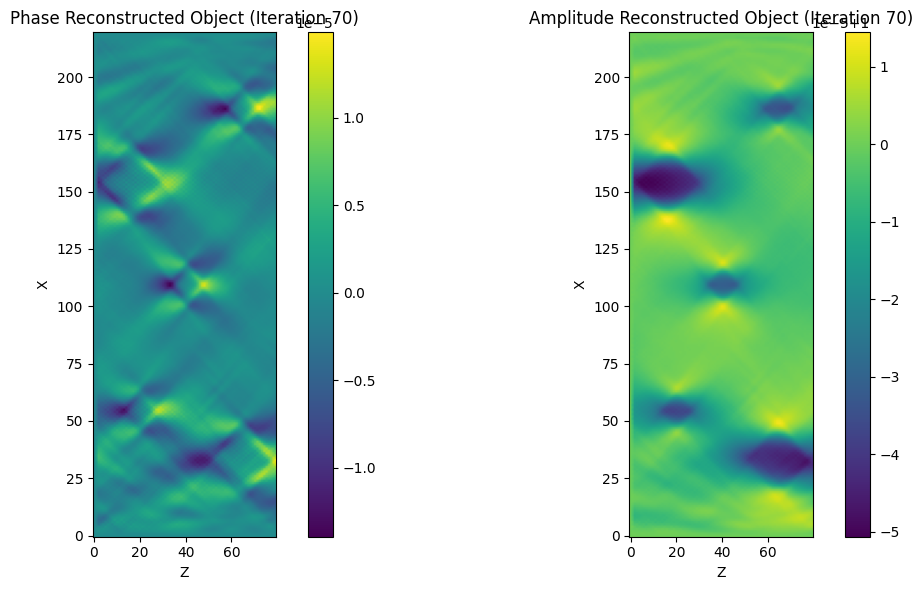

    Iteration 70 took 2.02 seconds.
Iteration 71/100
    RMSE: 1.5972279770710415e-05
    Iteration 71 took 1.65 seconds.
Iteration 72/100
    RMSE: 1.595226718707565e-05
    Iteration 72 took 1.46 seconds.
Iteration 73/100
    RMSE: 1.593273673329849e-05
    Iteration 73 took 1.81 seconds.
Iteration 74/100
    RMSE: 1.59136727989532e-05
    Iteration 74 took 1.26 seconds.
Iteration 75/100
    RMSE: 1.589505994797792e-05
    Reconstructed Object


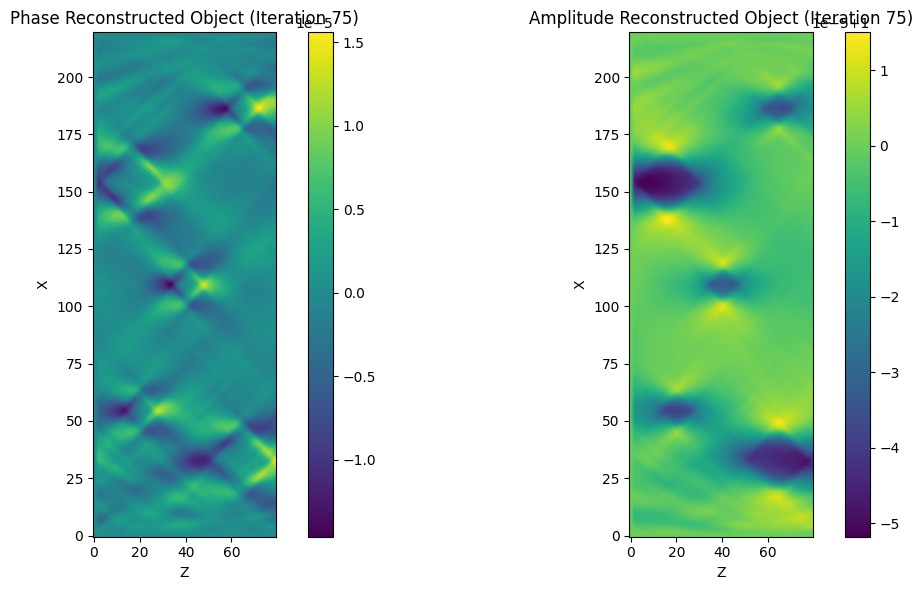

    Iteration 75 took 1.62 seconds.
Iteration 76/100
    RMSE: 1.58768847167464e-05
    Iteration 76 took 1.23 seconds.
Iteration 77/100
    RMSE: 1.585913111479746e-05
    Iteration 77 took 1.30 seconds.
Iteration 78/100
    RMSE: 1.584178312630189e-05
    Iteration 78 took 1.14 seconds.
Iteration 79/100
    RMSE: 1.582482715544175e-05
    Iteration 79 took 1.19 seconds.
Iteration 80/100
    RMSE: 1.5808239845356847e-05
    Reconstructed Object


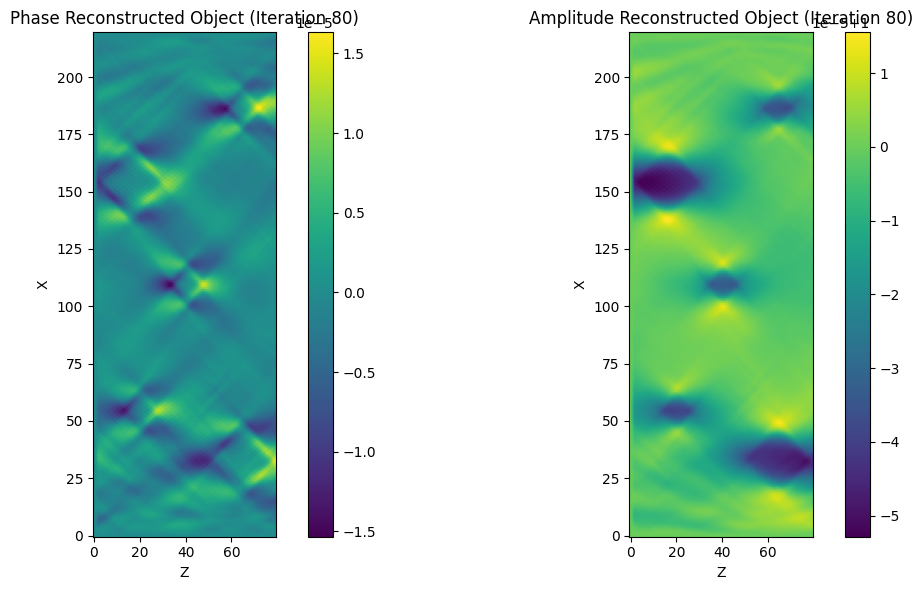

    Iteration 80 took 1.67 seconds.
Iteration 81/100
    RMSE: 1.5792009197570894e-05
    Iteration 81 took 1.18 seconds.
Iteration 82/100
    RMSE: 1.5776118761315648e-05
    Iteration 82 took 1.29 seconds.
Iteration 83/100
    RMSE: 1.5760551568719353e-05
    Iteration 83 took 1.29 seconds.
Iteration 84/100
    RMSE: 1.5745290500375422e-05
    Iteration 84 took 1.35 seconds.
Iteration 85/100
    RMSE: 1.573031891934057e-05
    Reconstructed Object


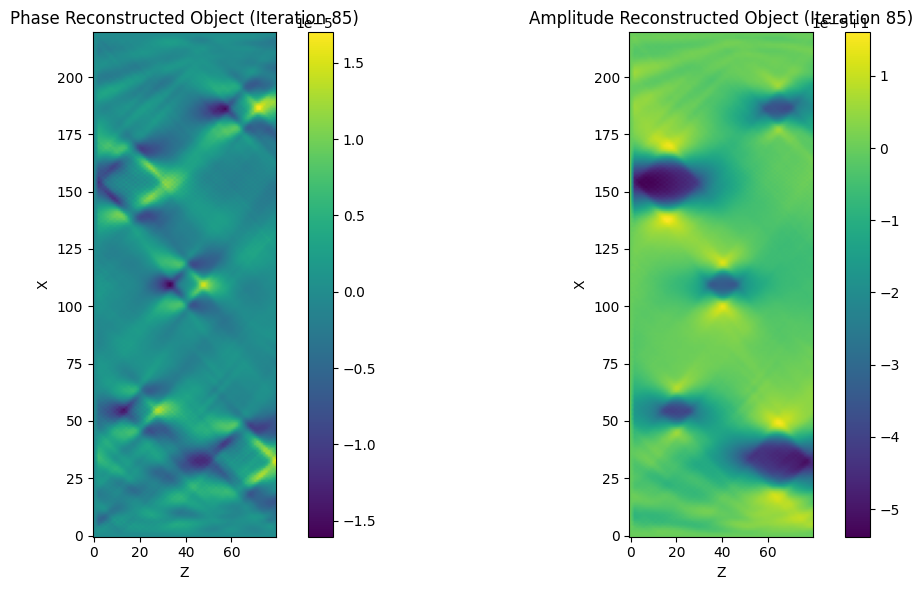

    Iteration 85 took 1.74 seconds.
Iteration 86/100
    RMSE: 1.571561875271011e-05
    Iteration 86 took 1.48 seconds.
Iteration 87/100
    RMSE: 1.5701174385248135e-05
    Iteration 87 took 1.20 seconds.
Iteration 88/100
    RMSE: 1.5686970086088155e-05
    Iteration 88 took 1.34 seconds.
Iteration 89/100
    RMSE: 1.567299099390388e-05
    Iteration 89 took 1.23 seconds.
Iteration 90/100
    RMSE: 1.565922325485214e-05
    Reconstructed Object


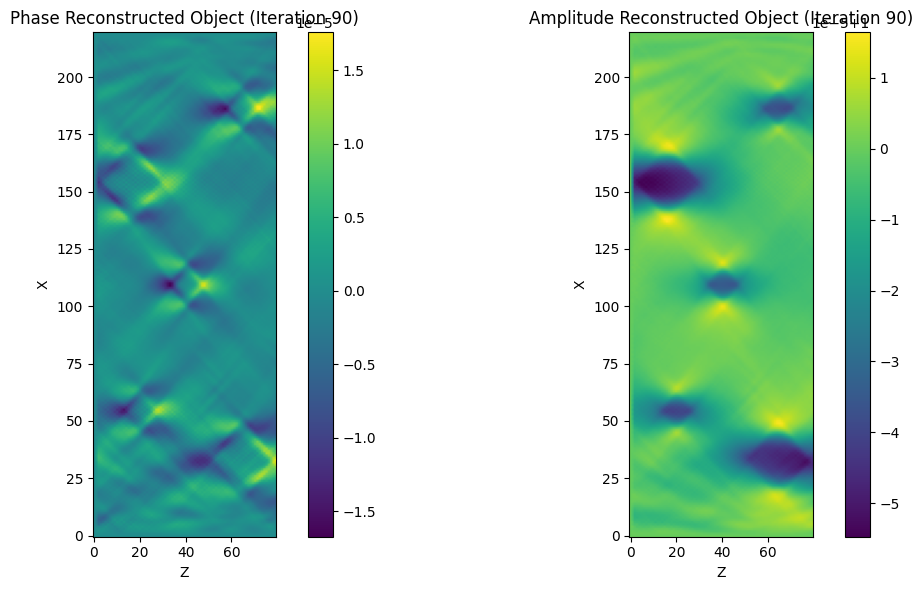

    Iteration 90 took 1.63 seconds.
Iteration 91/100
    RMSE: 1.564565413103664e-05
    Iteration 91 took 1.37 seconds.
Iteration 92/100
    RMSE: 1.5632272065155356e-05
    Iteration 92 took 1.26 seconds.
Iteration 93/100
    RMSE: 1.561906669928405e-05
    Iteration 93 took 1.23 seconds.
Iteration 94/100
    RMSE: 1.5606028852470115e-05
    Iteration 94 took 1.20 seconds.
Iteration 95/100
    RMSE: 1.5593150464979565e-05
    Reconstructed Object


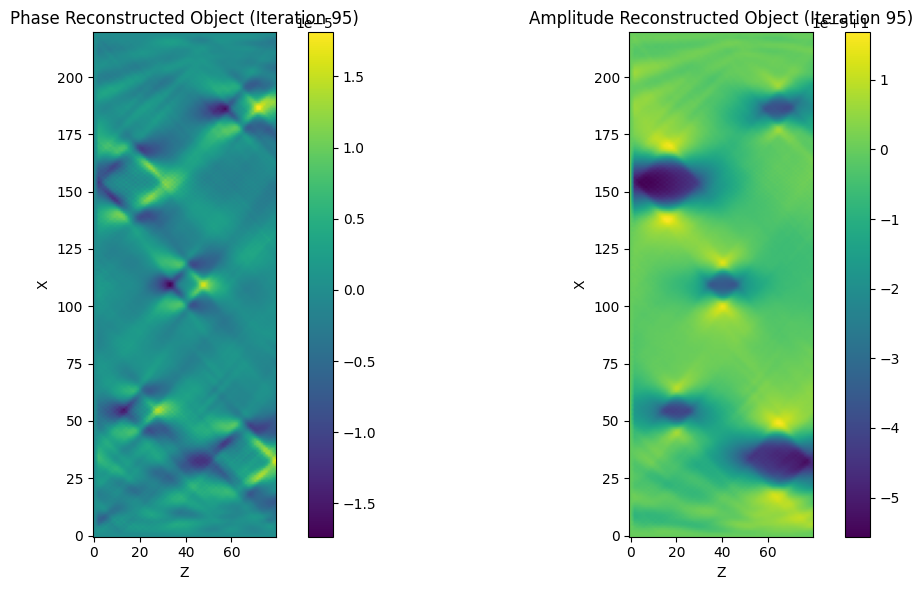

    Iteration 95 took 1.79 seconds.
Iteration 96/100
    RMSE: 1.55804245183211e-05
    Iteration 96 took 1.48 seconds.
Iteration 97/100
    RMSE: 1.5567844940086893e-05
    Iteration 97 took 1.52 seconds.
Iteration 98/100
    RMSE: 1.555540650158299e-05
    Iteration 98 took 1.72 seconds.
Iteration 99/100
    RMSE: 1.554310471463488e-05
    Iteration 99 took 1.76 seconds.
Iteration 100/100
    RMSE: 1.553093573223853e-05
    Reconstructed Object


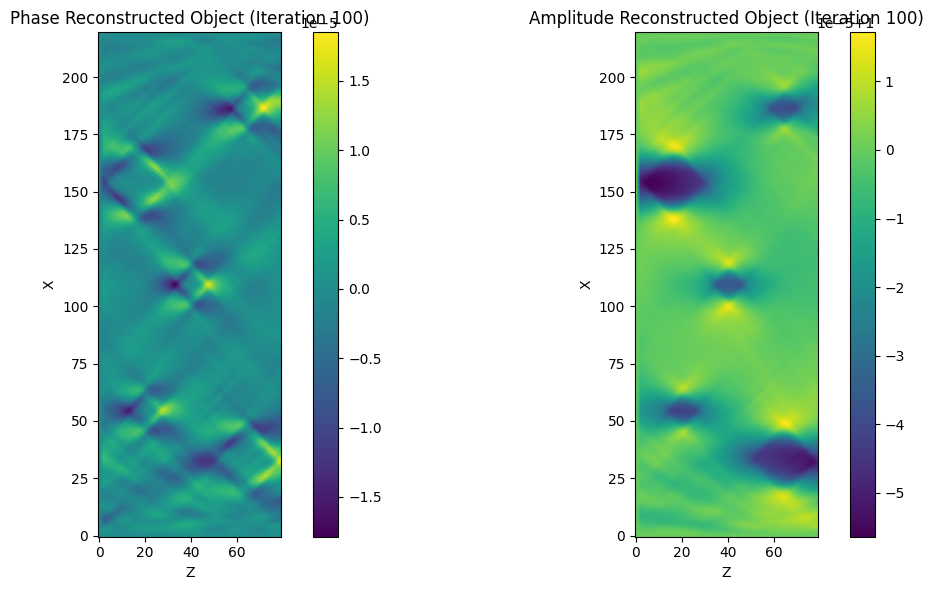

    Iteration 100 took 1.81 seconds.


In [7]:
max_iters = 100
reconstructed_sample_space, reconstructed_wave, residual_history = (
    least_squares.solve(max_iters=max_iters,
                        plot_forward=False,
                        plot_object=True,
                        fixed_step_size=None,
                        sparsity_lambda=0.00,
                        l2_lambda=0.00,
                        tv_lambda=0.0)
)

# %load_ext line_profiler
# target_method = least_squares.compute_alphak
# %lprun -f target_method least_squares.solve(max_iters=max_iters, plot_forward=False, plot_object=True, fixed_step_size=None, sparsity_lambda=0.00, l2_lambda=0.10,tv_lambda=0.00)
#%lprun -f LeastSquaresSolver.forward_model.solve least_squares.solve(max_iters=max_iters, plot_forward=False, plot_object=True, fixed_step_size=None, sparsity_lambda=0.05, l2_lambda=0.15)


### 7. Visualise the Residual History and Final Iterations

Residual History of Least Squares Solve


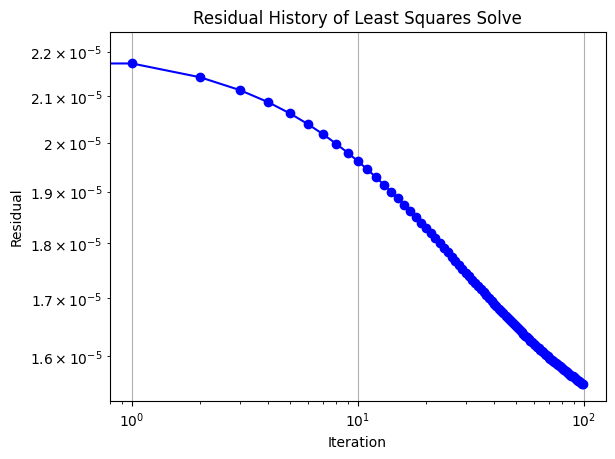

In [8]:
import matplotlib.pyplot as plt

# Log-log plot of residual
title ='Residual History of Least Squares Solve'
print(title)
plt.figure()
plt.loglog(residual_history, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Residual')
plt.title(title)
plt.grid(True)
plt.show()

Reconstructed Sample Space


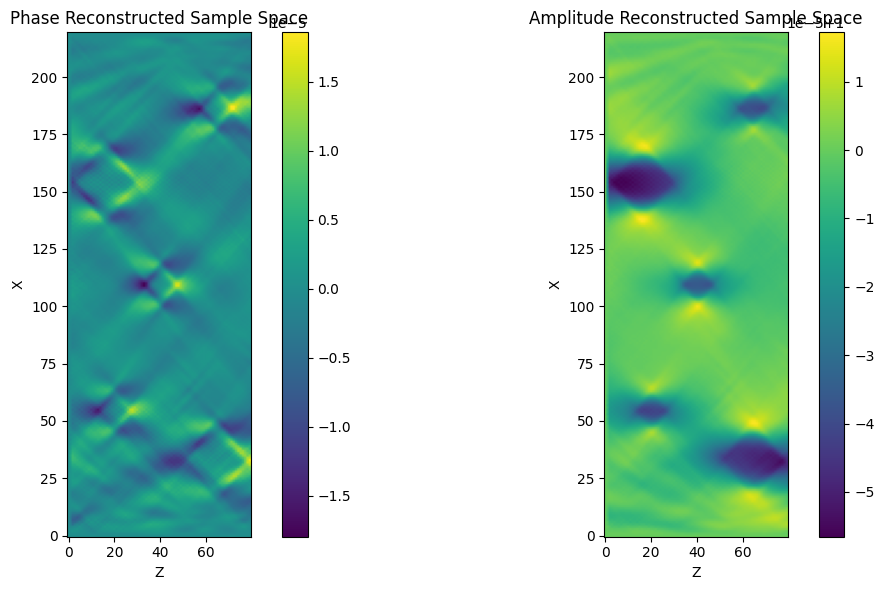

True Sample Space


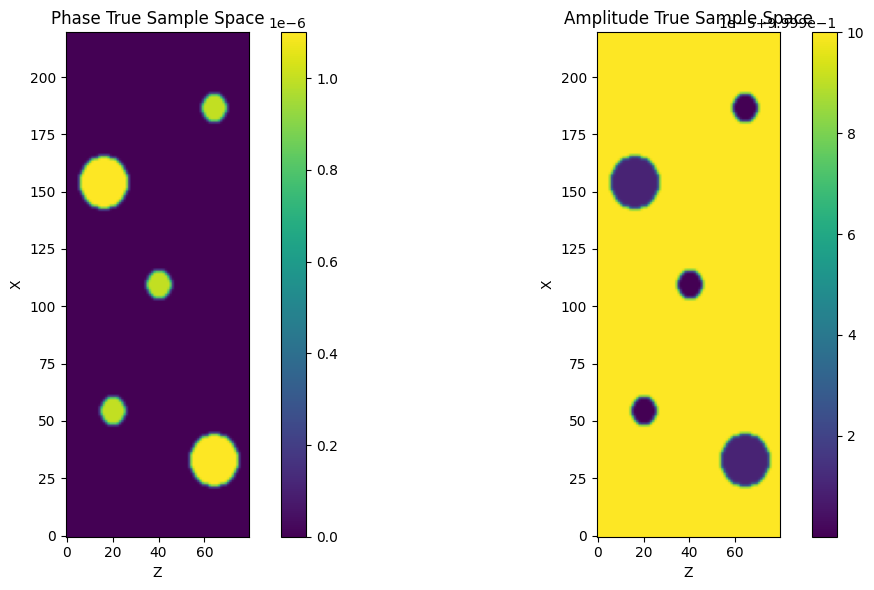

In [9]:
# Plot object field
title = "Reconstructed Sample Space"
print(title)
visualisation.plot(reconstructed_sample_space,title=title)

# Plot the true sample space
title = "True Sample Space"
print(title)
visualisation.plot(sample_space.n_true, title=title)

Reconstructed Wave


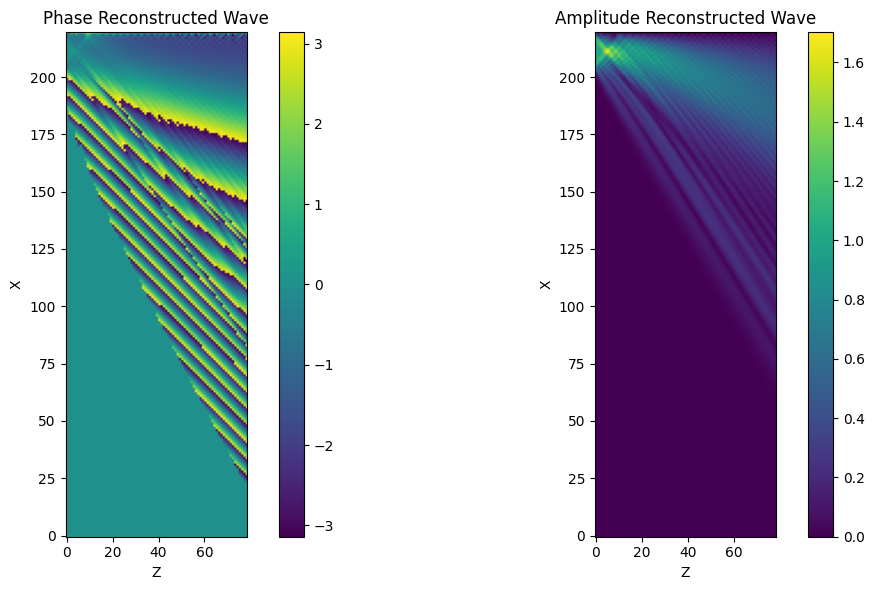

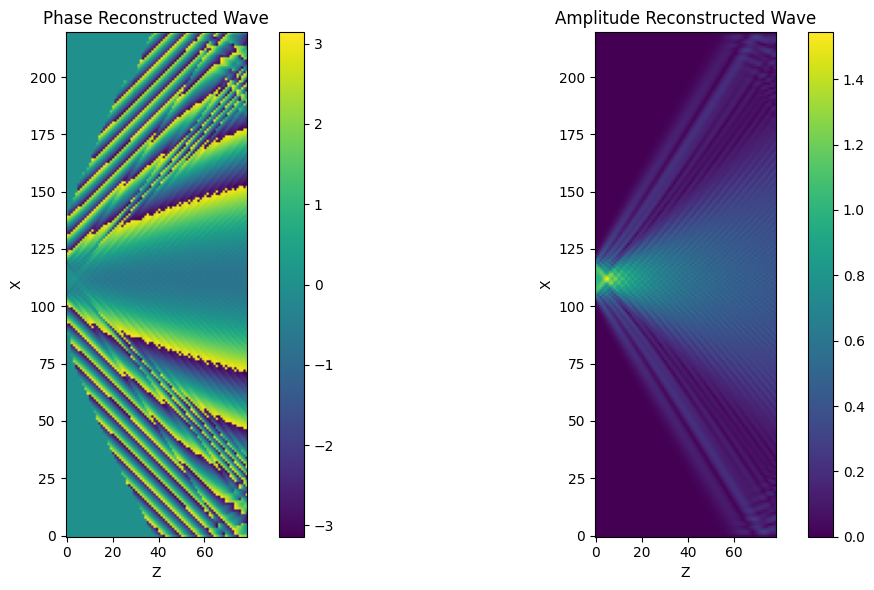

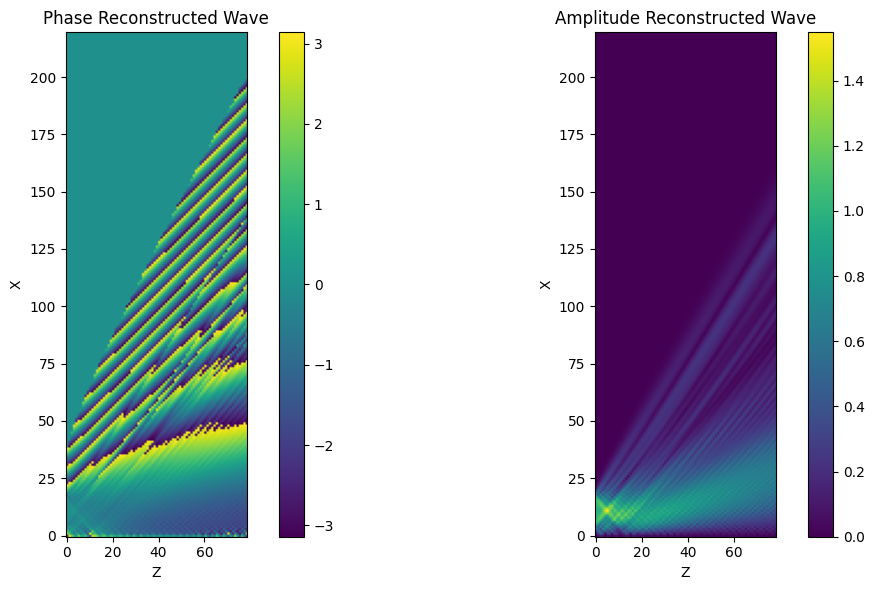

In [10]:
# Plot the reconstructed wave
title = "Reconstructed Wave"
print(title)
visualisation.plot(reconstructed_wave, title=title, probe_index=-1)
visualisation.plot(reconstructed_wave, title=title)
visualisation.plot(reconstructed_wave, title=title, probe_index=0)

In [11]:
# Profile the reconstruction
# %load_ext line_profiler
# %lprun -f SolveLeastSquares.compute_forward_model least_squares.solve(max_iters=max_iters, plot_forward=True, plot_object=True, fixed_step_size=False)